By :- Aditya Naranje

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [2]:
data = pd.read_csv("survey lung cancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.shape

(309, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [5]:
data.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [6]:
data['GENDER'] = data['GENDER'].replace(['F','M'],[0,1])
data['LUNG_CANCER'] = data['LUNG_CANCER'].replace(['YES','NO'],[1,0])

In [7]:
mapping = {1:0,
           2:1}

In [8]:
column = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ',
          'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH','SWALLOWING DIFFICULTY', 'CHEST PAIN']

In [9]:
for i in column:
    data[i] = data[i].map(mapping)

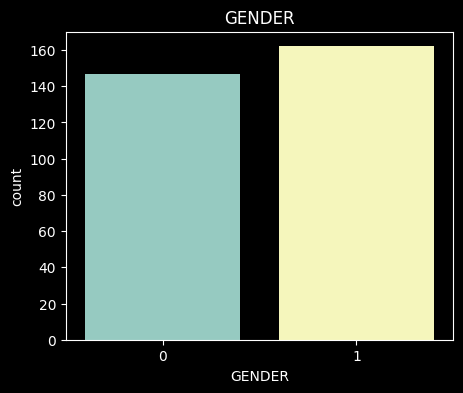

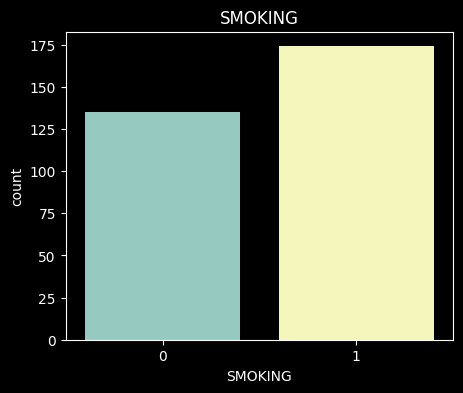

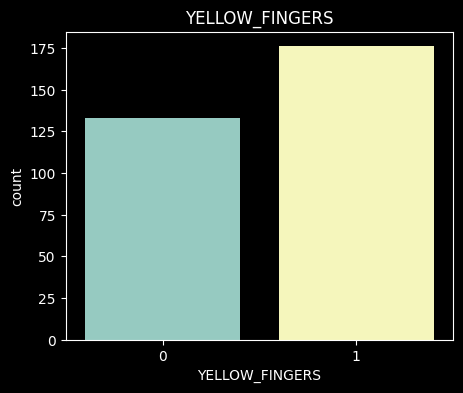

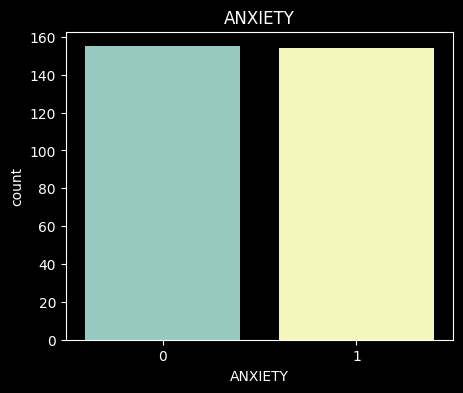

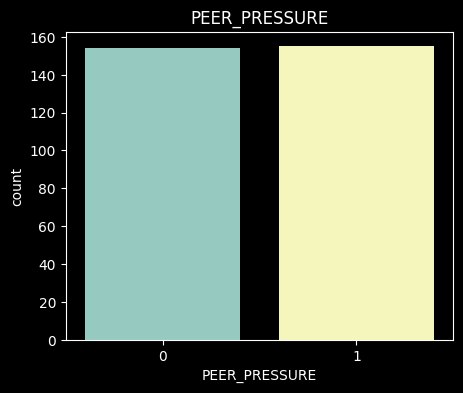

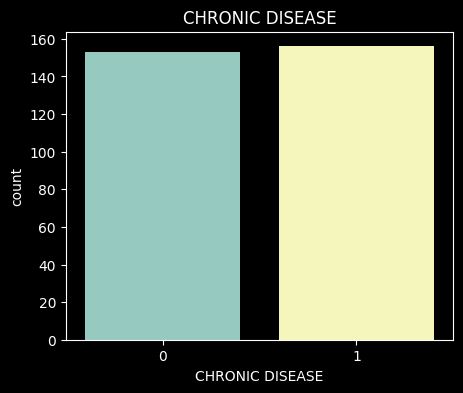

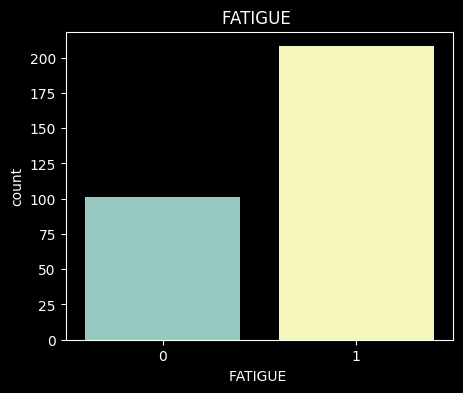

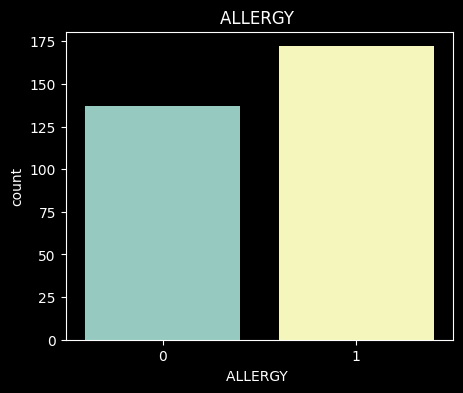

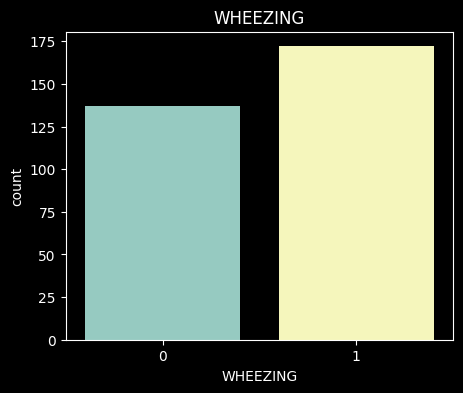

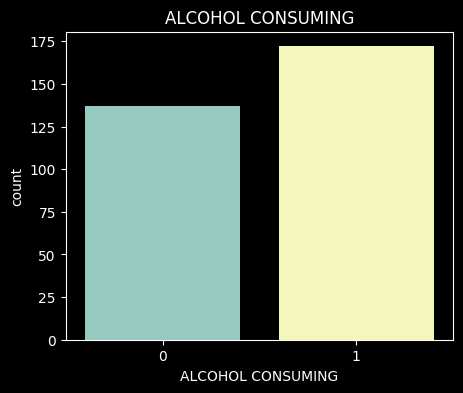

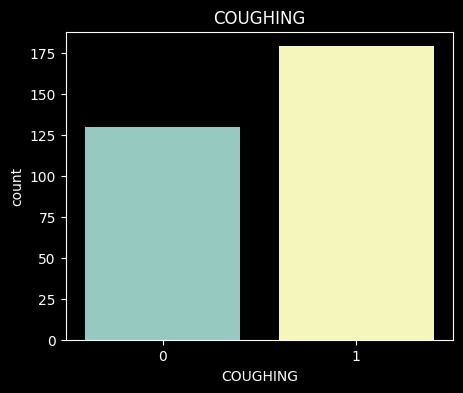

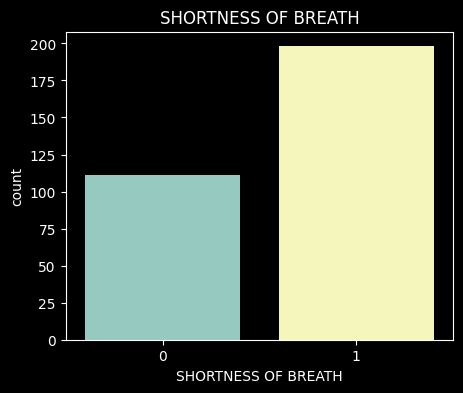

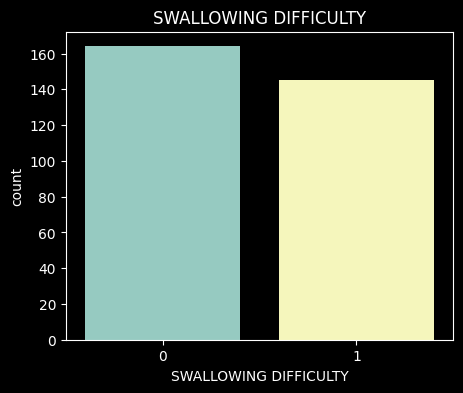

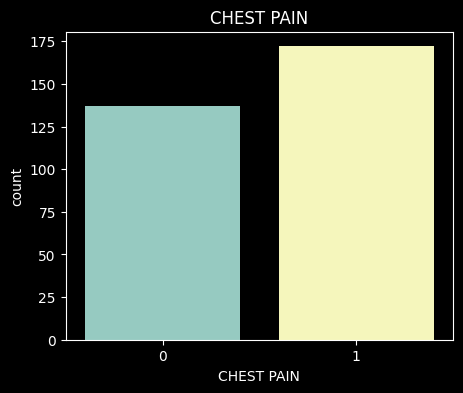

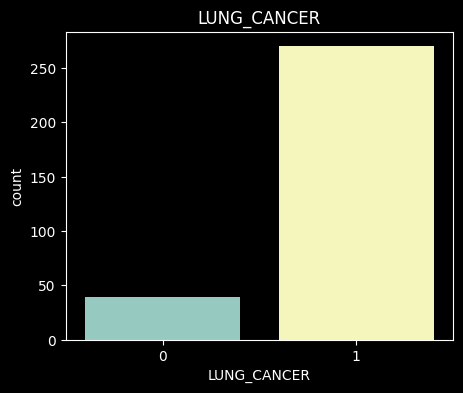

In [10]:
for i in data.columns:
    if data[i].nunique()<=2:
        plt.figure(figsize=(5,4))
        sns.countplot(data[i])
        plt.title(i)
        plt.show()

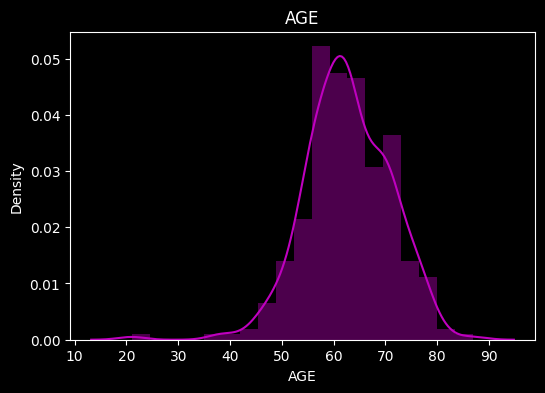

In [11]:
plt.figure(figsize=(6,4))
sns.distplot(data['AGE'], kde=True, color='m')
plt.title("AGE")
plt.show()

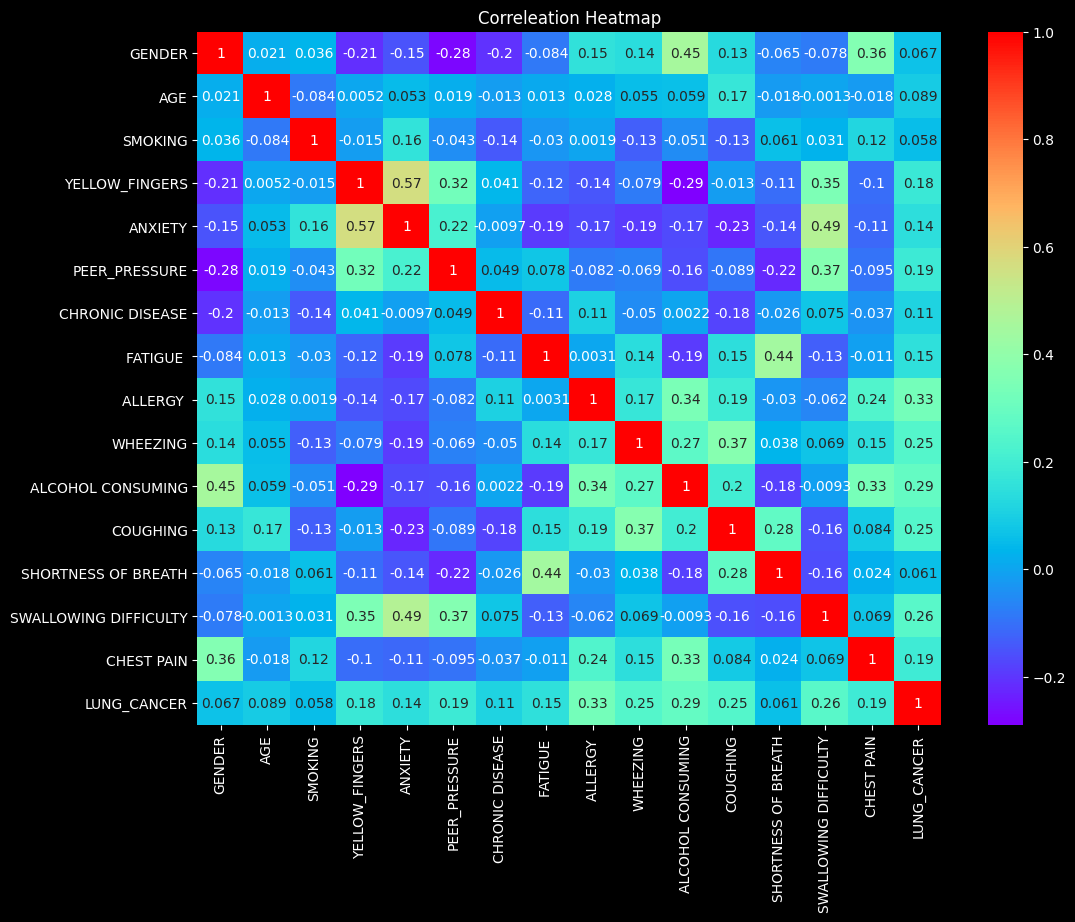

In [12]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(), annot=True, cmap = "rainbow")
plt.title("Correleation Heatmap")
plt.show()

In [13]:
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

In [14]:
y.value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

### Balancing Unbalanced Dataset

As our dataset is very small instead on under-sampling we will do over-sampling.

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
smote = SMOTE()

X_sample, y_sample = smote.fit_resample(X, y)

print('Original dataset \n',y.value_counts()) 
print('Resample dataset \n', y_sample.value_counts())

Original dataset 
 1    270
0     39
Name: LUNG_CANCER, dtype: int64
Resample dataset 
 1    270
0    270
Name: LUNG_CANCER, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X_sample,y_sample, test_size=0.15,random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("ET",ExtraTreesClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("SVC",SVC()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("GNB",GaussianNB()))

In [21]:
for name, model in models:
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(name)
    print(classification_report(y_train,train_pred))
    print(classification_report(y_test,test_pred))
    
    print(confusion_matrix(y_train,train_pred))
    print(confusion_matrix(y_test,test_pred))
    print('')

LR
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       230
           1       0.97      0.97      0.97       229

    accuracy                           0.97       459
   macro avg       0.97      0.97      0.97       459
weighted avg       0.97      0.97      0.97       459

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        41

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81

[[223   7]
 [  8 221]]
[[39  1]
 [ 1 40]]

DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       230
           1       1.00      1.00      1.00       229

    accuracy                           1.00       459
   macro avg       1.00      1.00      1.00       459
weighted avg       1.00  

Lets choose gradined boosting, random forest and KNN for further comparision

In [22]:
model1 = GradientBoostingClassifier()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()

In [23]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
pred_prob3 = model3.predict_proba(x_test)


In [24]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [25]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1,",", auc_score2,"," ,auc_score3)

0.9975609756097561 , 1.0 , 0.999390243902439


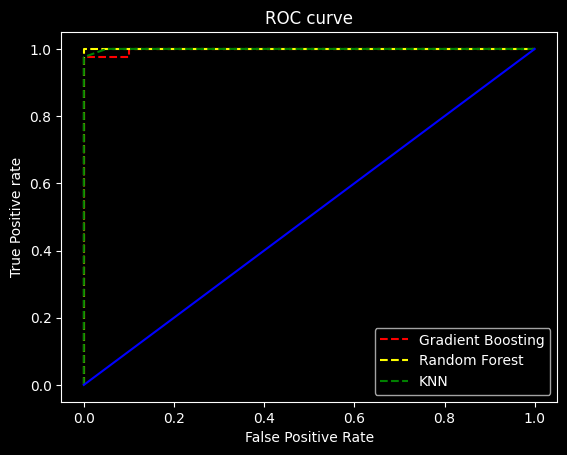

In [26]:
plt.plot(fpr1, tpr1, linestyle='--',color='r', label='Gradient Boosting')
plt.plot(fpr2, tpr2, linestyle='--',color='yellow', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();

From above three random forest performs better.

In [27]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
import pickle
pickle_out = open("lung_cancer.pkl","wb")
pickle.dump(model,pickle_out)
loaded_model = pickle.load(open("lung_cancer.pkl","rb"))
result = loaded_model.score(x_test,y_test)
print(result)

0.9629629629629629
